<a href="https://www.kaggle.com/code/scottfredschmidt/housing-it478?scriptVersionId=281497834" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Hyderabad Housing Market Analysis
## Illinois State Univerity - IT 478
### Scott Schmidt, Ahmed Bello, Justin Hoffman

# View Data

In [1]:
import pandas as pd

df = pd.read_excel('/kaggle/input/houseprice/HyderabadHousingPrices.xlsx')
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [2]:
df_shape = df.shape
print("Original data shape: ", df_shape)
df = df.drop_duplicates()

dups_count = df.duplicated().sum()
print("There are this many dups: ", dups_count)

Original data shape:  (2518, 40)
There are this many dups:  0


In [3]:
df = df.drop_duplicates()
df_shape = df.shape
df_shape

(1998, 40)

# Linear Regression

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [5]:
#Column list
cols = df.columns
df = df[cols]   # (optional) select only those columns

# 1. Split target & features
y = df["Price"]
X = df.drop(columns=["Price"])

# Identify categorical & numeric columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numeric_cols = X.select_dtypes(exclude=["object", "category"]).columns

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# 3. Linear Regression Model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [7]:
# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Location'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       '...se', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [9]:
#Results
r2 = model.score(X_test, y_test)
r2 = round(r2, 4)
print("R² score:", r2)

R² score: 0.8181


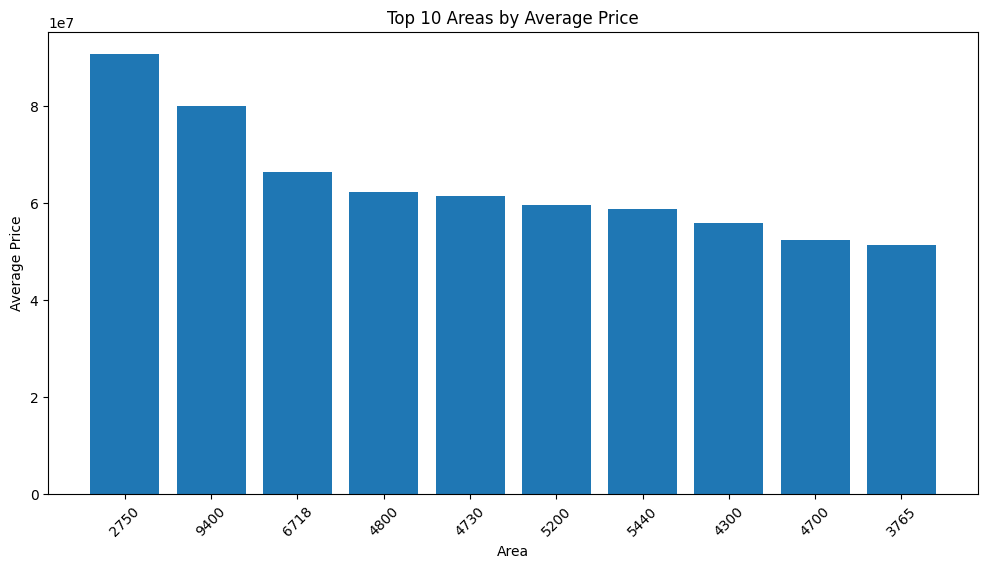

In [10]:
# Group by 'Area' and calculate mean price
area_stats = df.groupby('Area')['Price'].mean().sort_values(ascending=False)

# Top 10 areas by average price
top_areas = area_stats.head(10).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top_areas['Area'].astype(str), top_areas['Price'])
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.title('Top 10 Areas by Average Price')
plt.show()

 Create a PRICE_ANALYSIS Table with Specific Fields:
• Define and populate the PRICE_ANALYSIS table with the following columns:
• AverageArea: The average area of houses sold.
• MedianPrice: The median price of houses.
• TotalHousesSold: The total number of houses sold.
• Use SQL functions such as AVG, MEDIAN, COUNT for calculations.